In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare
from scipy import stats
import scipy as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm

In [2]:
df = pd.read_csv('./data/spstat1.csv', sep=',', encoding='euc-kr', engine='python')

In [3]:
df.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [4]:
df.tail(2)

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
250,242,2,3,1,200,2,1,2,4,2,...,5,5,1,1,1,2,1,2,1,1
251,72,2,5,2,250,1,4,2,3,3,...,2,1,0,3,2,8,3,6,1,1


In [5]:
df[1:5]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [6]:
df[:3]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1


In [7]:
df.columns[[1,4,5]]

Index(['사용브랜드', '구매가격', '정보획득'], dtype='object')

In [8]:
df[df.columns[[1,4,5]]]

,사용브랜드,구매가격,정보획득
0,1,15,1
1,1,20,4
2,1,25,1
3,1,26,4
4,1,30,6
...,...,...,...
247,2,200,6
248,2,200,6
249,2,200,2
250,2,200,2


In [9]:
df.loc[:, '학력':'결혼']

,학력,직업,월수입,결혼
0,2,4,2,2
1,4,4,4,2
2,4,7,4,2
3,2,2,5,3
4,4,9,2,1
...,...,...,...,...
247,7,8,2,1
248,6,4,6,2
249,6,4,3,2
250,2,1,2,1


In [10]:
df.iloc[1:7, 2:5]

,사용기간,구매장소,구매가격
1,3,3,20
2,2,1,25
3,5,3,26
4,3,5,30
5,1,4,30
6,5,2,40


In [11]:
df.at[5, '구매가격'] # 5행에 있는 '구매가격' 값 표시

30

In [12]:
df['구매가격']<50

0       True
1       True
2       True
3       True
4       True
       ...  
247    False
248    False
249    False
250    False
251    False
Name: 구매가격, Length: 252, dtype: bool

In [13]:
df[df['구매가격']<50]

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3
5,195,1,1,4,30,6,2,2,2,2,...,2,1,1,1,1,2,1,2,1,3
6,182,1,5,2,40,1,2,2,5,4,...,4,3,0,5,3,8,3,5,2,1
7,188,1,5,4,40,6,2,2,1,2,...,2,2,0,1,1,3,1,1,1,2
8,237,1,4,4,40,6,2,5,3,2,...,3,2,0,2,1,3,8,1,1,1
9,222,1,5,3,40,2,3,2,4,2,...,2,2,1,2,1,4,4,3,1,1


In [14]:
df[(df['구매가격']>150)&(df['구매가격']<200)] # 구매가격이 150초과 200미만인 값 출력

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
233,206,2,3,4,160,6,1,5,3,1,...,3,3,1,2,1,5,8,1,1,3
234,140,2,3,4,170,6,3,5,1,2,...,1,2,1,3,2,4,2,5,1,4
235,128,2,5,4,180,6,4,3,4,5,...,5,3,1,6,3,1,9,3,3,2
236,25,2,3,5,180,6,5,3,3,3,...,4,4,1,4,2,6,4,5,1,4
237,149,2,2,3,182,6,2,5,2,3,...,3,4,1,3,2,4,4,6,2,2
238,244,2,4,1,190,5,5,2,3,5,...,4,2,0,5,3,4,4,2,2,4
239,90,2,3,2,190,6,2,2,2,4,...,4,5,0,4,2,4,4,5,1,4


In [15]:
df_columns = df.copy()
df_columns.head()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
0,181,1,3,1,15,1,2,1,2,4,...,4,3,0,4,2,2,4,2,2,3
1,94,1,3,3,20,4,3,3,4,3,...,4,5,1,3,2,4,4,4,2,3
2,12,1,2,1,25,1,1,1,3,2,...,4,4,0,4,2,4,7,4,2,1
3,156,1,5,3,26,4,3,1,4,4,...,4,4,0,6,3,2,2,5,3,1
4,19,1,3,5,30,6,2,3,2,2,...,3,3,0,2,1,4,9,2,1,3


In [16]:
df_columns.columns

Index(['번호', '사용브랜드', '사용기간', '구매장소', '구매가격', '정보획득', '구입조언', '하루사용시간',
       '브랜드이미지', '가격만족도', '재구매의향', '구매중요도1_메모리', '구매중요도2_배터리', '구매중요도3_카메라',
       '구매중요도4_처리속도', '구매중요도5_보안기능', '구매중요도6_운영체계', '구매중요도7_디자인', '구매중요도8_음질',
       '구매중요도9_A/S', '구매중요도10_명성 ', '성별', '연령', '연령2', '학력', '직업', '월수입', '결혼',
       '가족수'],
      dtype='object')

기술통계

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   번호           252 non-null    int64
 1   사용브랜드        252 non-null    int64
 2   사용기간         252 non-null    int64
 3   구매장소         252 non-null    int64
 4   구매가격         252 non-null    int64
 5   정보획득         252 non-null    int64
 6   구입조언         252 non-null    int64
 7   하루사용시간       252 non-null    int64
 8   브랜드이미지       252 non-null    int64
 9   가격만족도        252 non-null    int64
 10  재구매의향        252 non-null    int64
 11  구매중요도1_메모리   252 non-null    int64
 12  구매중요도2_배터리   252 non-null    int64
 13  구매중요도3_카메라   252 non-null    int64
 14  구매중요도4_처리속도  252 non-null    int64
 15  구매중요도5_보안기능  252 non-null    int64
 16  구매중요도6_운영체계  252 non-null    int64
 17  구매중요도7_디자인   252 non-null    int64
 18  구매중요도8_음질    252 non-null    int64
 19  구매중요도9_A/S   252 non-null    int64
 20  구매중요도10_명성

In [18]:
df.describe()

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,126.500000,1.496032,3.091270,2.940476,101.226190,3.924603,2.313492,2.896825,2.730159,2.777778,...,3.146825,3.027778,0.500000,3.130952,1.809524,4.484127,4.678571,3.702381,1.722222,2.468254
std,72.890329,0.500979,1.328362,1.318135,38.654982,2.193405,1.111752,1.393379,1.128499,1.024706,...,1.128352,1.346096,0.500995,1.244396,0.699622,1.766145,2.246701,1.701509,0.499225,0.937799
min,1.000000,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,63.750000,1.000000,2.000000,2.000000,80.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,0.000000,2.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000
50%,126.500000,1.000000,3.000000,3.000000,100.000000,5.000000,2.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,0.500000,3.000000,2.000000,4.000000,4.000000,4.000000,2.000000,3.000000
75%,189.250000,2.000000,4.000000,4.000000,120.000000,6.000000,3.000000,4.000000,3.250000,3.000000,...,4.000000,4.000000,1.000000,4.000000,2.000000,6.000000,6.250000,5.000000,2.000000,3.000000
max,252.000000,2.000000,5.000000,5.000000,250.000000,6.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,1.000000,6.000000,3.000000,8.000000,10.000000,6.000000,3.000000,5.000000


In [19]:
df['구매가격'].describe()

count    252.000000
mean     101.226190
std       38.654982
min       10.000000
25%       80.000000
50%      100.000000
75%      120.000000
max      250.000000
Name: 구매가격, dtype: float64

In [20]:
df['구매가격'].kurtosis() # 첨도

1.3613500036652209

In [21]:
df['사용브랜드'].value_counts()

1    127
2    125
Name: 사용브랜드, dtype: int64

In [22]:
df['사용브랜드'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
247    2
248    2
249    2
250    2
251    2
Name: 사용브랜드, Length: 252, dtype: int64>

In [23]:
from matplotlib import font_manager, rc, rcParams
rc('font', family = 'Malgun Gothic')
rcParams['font.family']

['Malgun Gothic']

In [24]:
%matplotlib inline
df['사용브랜드'].replace([1,2],['삼성', '애플']).value_counts()

삼성    127
애플    125
Name: 사용브랜드, dtype: int64

<AxesSubplot:>

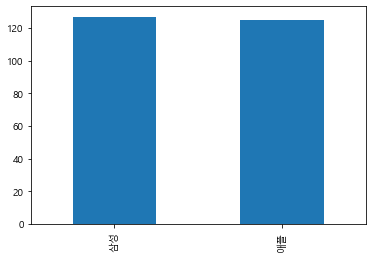

In [25]:
df['사용브랜드'].replace([1,2],['삼성', '애플']).value_counts().plot(kind='bar')

In [26]:
df['성별'].value_counts()

0    126
1    126
Name: 성별, dtype: int64

<AxesSubplot:>

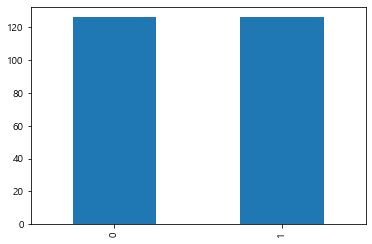

In [27]:
%matplotlib inline
df['성별'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='구매장소'>

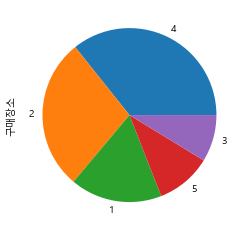

In [28]:
%matplotlib inline
df['구매장소'].value_counts().plot(kind='pie')

교차분석

In [29]:
pd.crosstab(df['월수입'],df['사용브랜드'])

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [30]:
df['사용브랜드'] = df['사용브랜드'].replace([1,2],['삼성', '애플'])

In [31]:
pd.crosstab(df['월수입'],df['사용브랜드'])

사용브랜드,삼성,애플
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [41]:
pd.crosstab(df['구매장소'], df['성별'])

성별,0,1
구매장소,,
1,24,19
2,42,29
3,9,13
4,38,52
5,13,13


In [42]:
df['구매장소']

0      1
1      3
2      1
3      3
4      5
      ..
247    5
248    5
249    1
250    1
251    2
Name: 구매장소, Length: 252, dtype: int64

In [43]:
chisquare(df['구매장소'])

Power_divergenceResult(statistic=148.31174089068827, pvalue=0.9999999645077914)

In [44]:
chisquare(df['구매장소'], ddof=[0,1])

Power_divergenceResult(statistic=148.31174089068827, pvalue=array([0.99999996, 0.99999995]))

In [38]:
chisquare(df['월수입'],df['사용브랜드'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
1.4748010610079576

- 위 오류 해결방법 1

In [39]:
import numpy as np
fobs = np.array([10,20])
fexp = np.array([30,60])
# adjust the totals
# gives array([10., 20.]), the same as observed
fexp = fexp * (np.sum(fobs)/np.sum(fexp)) 
chisquare(f_obs=fobs, f_exp=fexp)
# the correct result
# Power_divergenceResult(statistic=0.0, pvalue=1.0)

# 관찰빈도(fobs)와 기대빈도(fexp)가 정확히 일치 해야 함 
# 한 벡터는 다른 벡터의 정확한 배수여야 함 (p-value =1 >> 전혀 유효하지 않음)
# (f_obs=[10,20], f_exp=[30,60])
# Power_divergenceResult(statistic=40.0, pvalue=2.5396285894708634e-10)
# p-value가 0에 가까우기 때문에 유효함 
# ((10-30)**2 /30) + ((20-60)** 2 / 60) = 40

Power_divergenceResult(statistic=0.0, pvalue=1.0)

In [40]:
import numpy as np
fobs = df.월수입
fexp = df.사용브랜드
fexp = fexp * (np.sum(fobs)/np.sum(fexp)) 
chisquare(f_obs=fobs, f_exp=fexp)

Power_divergenceResult(statistic=343.26420150053593, pvalue=9.618060771117479e-05)

- 위 오류 해결방법 2 : [블로그 참고](https://junsik-hwang.tistory.com/23) - 추천

In [46]:
import pandas as pd
import scipy.stats as stats

In [45]:
result = pd.crosstab(df.월수입, df.사용브랜드) # 교차표 생성
result

사용브랜드,1,2
월수입,,
1,20,13
2,14,22
3,28,24
4,20,17
5,12,28
6,33,21


In [47]:
stats.chi2_contingency(observed=result)

(12.86516581745558,
 0.024675611662926037,
 5,
 array([[16.63095238, 16.36904762],
        [18.14285714, 17.85714286],
        [26.20634921, 25.79365079],
        [18.6468254 , 18.3531746 ],
        [20.15873016, 19.84126984],
        [27.21428571, 26.78571429]]))

chi-Square값 : 12.86516581745558</br>
P-value : 0.024675611662926037 < 0.05 </br>
df(degree of freedom) : K-1 >> 5(=6-1)</br>
array : 기대치(Expected Value)</br>

- 통계적으로 유의한 차이가 있음 : 귀무가설 기각
- 월수입에 따라 사용브랜드 차이가 있음


### T-검정

In [33]:
df = pd.read_csv('./data/spstat1.csv', sep=',', encoding='euc-kr', engine='python')

In [34]:
mean = df['구매가격'].values
mean1 = df[df['사용브랜드'] == 1].구매가격.values
mean2 = df[df['사용브랜드'] == 2].구매가격.values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missin

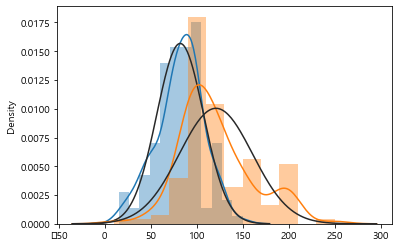

ShapiroResult(statistic=0.9720979928970337, pvalue=0.009973179548978806)

In [35]:
%matplotlib inline

sns.distplot(mean1, kde=True, fit=sp.stats.norm)
sns.distplot(mean2, kde=True, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1) 

- [shapiro](https://www.statology.org/shapiro-wilk-test-python/) : 테스트 이름</br>
Shapiro-Wilk Test on Normally Distributed Data ( 정규성 검정 테스트 )</br>
shapiro 테스트 결과, pvalue=0.009973179548978806로 0.05보다 작으므로 등분산성 가정 위배

In [36]:
# 레빈 테스트로 재확인

sp.stats.levene(mean1, mean2)
# 레빈 테스트 결과, 사용브랜드간 (두 집단) 등분산성 가정은 위배됨(기각됨)

LeveneResult(statistic=13.443717170975082, pvalue=0.00030027808643848084)

In [37]:
# 독립 표본 t 검정 (등분산성 위배 조건)
stats.ttest_ind(mean1, mean2, equal_var=False)

# pvalue=3.598124628532717e-17 < 0.05 이므로, 두 집단 간 유의한 차이가 있음
# pvalue=3.598124628532717e-17 -> 0.000000000000000003598124628532717

Ttest_indResult(statistic=-9.2004623883404, pvalue=3.598124628532717e-17)

In [48]:
df['재구매의향']

0      3
1      3
2      2
3      5
4      3
      ..
247    3
248    3
249    4
250    3
251    3
Name: 재구매의향, Length: 252, dtype: int64

In [49]:
mean = df['재구매의향'].values
mean1 = df[df['사용브랜드'] == 1].재구매의향.values
mean2 = df[df['사용브랜드'] == 2].재구매의향.values

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


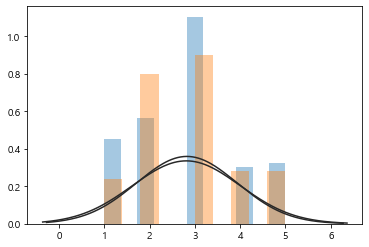

ShapiroResult(statistic=0.8974907994270325, pvalue=7.541181901160598e-08)

In [51]:
%matplotlib inline

sns.distplot(mean1, kde=False, fit=sp.stats.norm)
sns.distplot(mean2, kde=False, fit=sp.stats.norm)
plt.show()
sp.stats.shapiro(mean1) 

귀무가설(H0) : 정규분포를 따른다

In [53]:
sp.stats.levene(mean1, mean2)
# pvalue=0.7315465812585951 > 0.05
# 귀무가설(등분사 가정 기각 못함 >> 가정 충족함)

LeveneResult(statistic=0.1179597504462619, pvalue=0.7315465812585951)

In [54]:
# independent 2 sample t_test
stats.ttest_ind(mean1, mean2, equal_var=True) # 등분산 가정

# pvalue=0.9290258377820513 > 0.05
# 통계적으로 유의미한 차이가 없음

Ttest_indResult(statistic=-0.0891603787635918, pvalue=0.9290258377820513)

### 분산분석

In [59]:
anova1 = df[df['연령2']==1].재구매의향.values
anova2 = df[df['연령2']==2].재구매의향.values
anova3 = df[df['연령2']==3].재구매의향.values
# 연령2 : 3 집단으로 줄임(요인분석한 결과값임)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

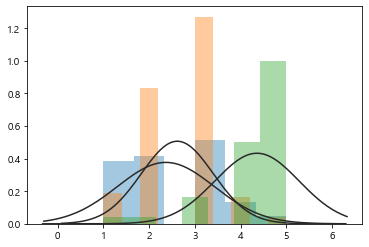

In [61]:
sns.distplot(anova1, kde = False, fit=sp.stats.norm)
sns.distplot(anova2, kde = False, fit=sp.stats.norm)
sns.distplot(anova3, kde = False, fit=sp.stats.norm)
plt.show()

In [62]:
stats.f_oneway(anova1, anova2, anova3)
# pvalue=1.613686022426391e-25 < 0.05
# H0 : 연령2의 세 집단간 재구매의향은 차이가 없다
# 세 집단간 모두 차이가 없다고 말할 수 없다. >> 사후 테스트 필요

F_onewayResult(statistic=72.42612494637737, pvalue=1.613686022426391e-25)

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = df['재구매의향'],   # data
                          groups=df['연령2'],         # groups 
                          alpha=0.05)                  # 유의수준(significance level)
tukey.summary()

# 결과 해석
# 1-3, 2-3 집단간 평균 차이 존재 : p-value = 0.001, 귀무가설 기각(reject=True)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,0.25,0.1275,-0.0526,0.5526,False
1,3,1.9905,0.001,1.5849,2.396,True
2,3,1.7405,0.001,1.3514,2.1295,True


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


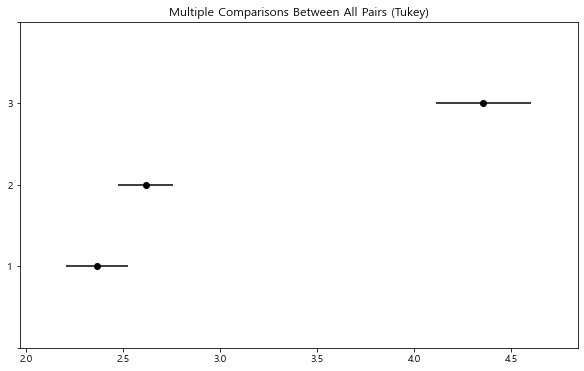

In [66]:
tukey.plot_simultaneous()
plt.vlines(x=49.57, ymin=-0.5, ymax=4.5, color='red')
plt.show()

In [67]:
# 연령에 따른 구매가격 차이

anova1 = df[df['연령2']==1].구매가격.values
anova2 = df[df['연령2']==2].구매가격.values
anova3 = df[df['연령2']==3].구매가격.values

stats.f_oneway(anova1, anova2, anova3)
# 일원분산분석 결과, f 통계량은 0.818 이고, pvalue=0.442 > 0.05 이므로
# 세 집단 간 유의미한 차이가 없음

F_onewayResult(statistic=0.8181036982598708, pvalue=0.44245014422691564)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

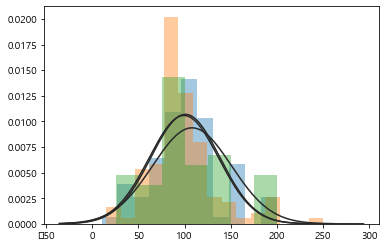

In [68]:
sns.distplot(anova1, kde=False, fit=sp.stats.norm)
sns.distplot(anova2, kde=False, fit=sp.stats.norm)
sns.distplot(anova3, kde=False, fit=sp.stats.norm)
plt.show()

### 상관분석

In [69]:
sp.stats.pearsonr(df.재구매의향, df.구입조언)

(0.41783620648818587, 4.5460753882723845e-12)

In [71]:
corr = sp.stats.pearsonr(df.재구매의향, df.구입조언)
print('상관관계= %.2f, p-value=%.2f'%(corr))

상관관계= 0.42, p-value=0.00


In [74]:
df.corr(method='pearson')

,번호,사용브랜드,사용기간,구매장소,구매가격,정보획득,구입조언,하루사용시간,브랜드이미지,가격만족도,...,구매중요도9_A/S,구매중요도10_명성,성별,연령,연령2,학력,직업,월수입,결혼,가족수
번호,1.000000,-0.047623,0.055364,-0.025606,-0.086080,-0.051147,-0.050270,0.016985,0.136440,0.078784,...,0.052534,-0.010902,-1.080086e-02,-0.038587,-3.437524e-03,-0.018785,0.014950,-0.201912,-0.155690,0.020283
사용브랜드,-0.047623,1.000000,0.015513,-0.009409,0.504192,-0.056471,-0.022794,-0.023418,-0.086466,-0.048290,...,-0.319646,-0.268644,7.936758e-03,0.035986,2.056873e-02,0.015688,0.078505,0.000946,0.011505,-0.012989
사용기간,0.055364,0.015513,1.000000,-0.033291,0.055694,-0.041385,0.163995,-0.031484,0.364656,0.275456,...,0.049501,-0.070494,2.095292e-02,0.289194,2.802837e-01,0.135625,-0.067558,0.170708,0.200593,-0.031246
구매장소,-0.025606,-0.009409,-0.033291,1.000000,0.000500,0.154155,0.129688,0.096426,-0.112618,-0.101271,...,-0.015530,-0.003555,1.116104e-01,0.063064,3.949891e-02,0.005582,0.052707,-0.052339,-0.025227,-0.125619
구매가격,-0.086080,0.504192,0.055694,0.000500,1.000000,0.036478,0.166607,0.162502,0.016474,0.121168,...,-0.061142,-0.089322,5.441430e-02,0.026217,4.756285e-02,0.102732,-0.021546,0.140954,0.010288,0.031466
정보획득,-0.051147,-0.056471,-0.041385,0.154155,0.036478,1.000000,0.044041,0.036552,-0.109654,0.001379,...,0.031857,0.084373,2.084692e-01,-0.028481,-5.093567e-02,-0.030649,0.040337,0.024921,-0.008287,0.110201
구입조언,-0.050270,-0.022794,0.163995,0.129688,0.166607,0.044041,1.000000,0.152128,0.255051,0.365651,...,0.315692,0.199148,9.656477e-02,0.623919,6.405167e-01,0.202405,-0.178018,0.203266,0.243664,-0.011434
하루사용시간,0.016985,-0.023418,-0.031484,0.096426,0.162502,0.036552,0.152128,1.000000,-0.045647,0.050846,...,0.019810,0.010031,-6.277929e-02,0.033098,2.471600e-02,0.225983,0.023726,0.107988,-0.087184,0.085902
브랜드이미지,0.136440,-0.086466,0.364656,-0.112618,0.016474,-0.109654,0.255051,-0.045647,1.000000,0.512966,...,0.240870,0.141335,-7.046798e-03,0.300457,3.383337e-01,0.089793,-0.023346,0.113624,0.121006,0.029519
가격만족도,0.078784,-0.048290,0.275456,-0.101271,0.121168,0.001379,0.365651,0.050846,0.512966,1.000000,...,0.283316,0.218231,-8.536627e-02,0.494699,5.186812e-01,0.057481,0.015575,0.137864,0.307197,0.079693


### 회귀분석

In [75]:
ols(formula='재구매의향 ~ 성별+연령+학력+월수입+사용기간+구매가격+구입조언+브랜드이미지+가격만족도+구매중요도1_메모리+하루사용시간', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재구매의향   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     51.44
Date:                Tue, 08 Feb 2022   Prob (F-statistic):           7.46e-57
Time:                        11:34:17   Log-Likelihood:                -240.30
No. Observations:                 252   AIC:                             504.6
Df Residuals:                     240   BIC:                             547.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1580      0.226     -0.699      0.485      -0.603       0.287
성별             0.0573      0.085      0.672      0.502      -0.111       0.225
연령             0.0503      0.047      1.071      0.285      -0.042       0.143
학력             0.0062      0.025      0.246      0.806      -0.043       0.056
월수입           -0.0368      0.027     -1.372      0.171      -0.090       0.016
사용기간           0.1292      0.034      3.807      0.000       0.062       0.196
구매가격        3.583e-06      0.001      0.003      0.997      -0.002       0.002
구입조언           0.1206      0.049      2.459      0.015       0.024       0.217
브랜드이미지         0.4527      0.044     10.261      0.000       0.366       0.540
가격만족도          0.3961      0.052      7.626      0.000       0.294       0.498
구매중요도1_메모리    -0.0426      0.028     -1.538      0.125      -0.097       0.012
하루사용시간        -0.0010      0.031     -0.033      0.974      -0.062       0.060
==============================================================================
Omnibus:                        4.865   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.345
Skew:                          -0.249   Prob(JB):                        0.114
Kurtosis:                       2.592   Cond. No.                         611.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

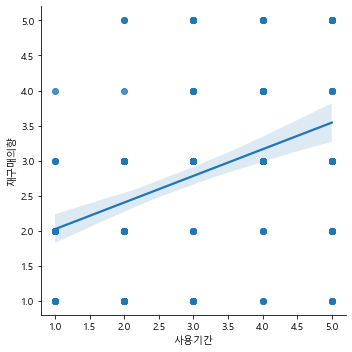

In [76]:
sns.lmplot(y='재구매의향', x='사용기간', data=df)